#### Exam description
For this exam, you will predict the target values for the test.csv. 

#### Your task:
find a good machine learning model to predict the target value. Then predict the target values of the instances in the test.csv. 

#### Exam rules
- You can use only the machine learning models discussed in this course. 
    - If the prediction is based on a model that is not discussed in class, one of the models in your submission will randomly be selected for grading. 
- Fifty percent of the grade is based on your Python code submission. The other 50 percent of your grade is based on the evaluation score of the prediction. 
- The exam should be syntax error-free. Run your code before the final submission. 
- Save the final prediction array as ``final_test_prediction``. 
- <font color = 'red'> The final prediction will be evaluated using the **macro precision** function. </font>

#### Devliverable
Submit ONLY the iPython notebook or the .py file of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

#### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|Machine learning model | Demonstrate limited understanding of methods used to train machine learning models | Demonstrate the ability to understand techniques used to train machine learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.

#### Dataset
The data set contains various information about a Telecommunication company customers like age, region etc.The list of information is as follow. 

|Column Name	|Description and Specifics|
|:----|:--|
|Region	|Region code to the area where customers belong.|
|Tenure	|Their span of choosing the company.|
|Age	|Age of the customers.|
|Income	|Their average Salaries|
|Marital	|Their Martial Status|
|Address	|Address Zone|
|Ed	|Education Group|
|Employ	|Employment Years|
|Retire	|Retirement Status|
|Gender	|Their Gender|
|Reside	|Area Code where they live|
|Custcat	|Customer Category (Target Variable)|


# Preprocessing ``train.csv`` (15 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head(100)

,region,tenure,age,income,marital,address zone,ed,employ,retire,gender,reside,custcat
0,3.0,999,23,31.0,Married,Zone 1,3.0,1,No,Female,2.0,D
1,2.0,59,30,34.0,Single,Zone 2,NaN,2,No,Female,1.0,B
2,3.0,3,20,17.0,Married,Zone 1,2.0,0,No,Female,4.0,A
3,3.0,44,32,96.0,Married,Zone 1,4.0,5,No,Female,4.0,D
4,1.0,11,26,53.0,Single,Zone 2,3.0,3,No,Male,1.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,8,49,134.0,Single,Zone 14,4.0,9,No,Female,1.0,D
96,3.0,25,29,55.0,Single,Zone 9,4.0,1,No,Male,1.0,A
97,1.0,48,41,43.0,Single,Zone 21,2.0,7,No,Male,1.0,B
98,1.0,11,24,31.0,Married,Zone 0,2.0,3,No,Female,4.0,D


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        774 non-null    float64
 1   tenure        800 non-null    int64  
 2   age           800 non-null    int64  
 3   income        784 non-null    float64
 4   marital       788 non-null    object 
 5   address zone  800 non-null    object 
 6   ed            781 non-null    float64
 7   employ        800 non-null    int64  
 8   retire        800 non-null    object 
 9   gender        800 non-null    object 
 10  reside        774 non-null    float64
 11  custcat       800 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 75.1+ KB


Region, income, marital, ed, reside have missing values

In [4]:
df_train.describe()

,region,tenure,age,income,ed,employ,reside
count,774.000000,800.000000,800.000000,784.000000,781.000000,800.000000,774.000000
mean,2.043928,89.433750,41.630000,76.922194,2.669654,11.081250,2.326873
std,0.812664,223.174582,12.400517,108.286705,1.223054,10.152388,1.421650
min,1.000000,1.000000,19.000000,9.000000,1.000000,0.000000,1.000000
25%,1.000000,17.000000,32.000000,29.000000,2.000000,3.000000,1.000000
50%,2.000000,36.000000,40.000000,48.000000,3.000000,8.000000,2.000000
75%,3.000000,57.000000,51.000000,83.000000,4.000000,17.000000,3.000000
max,3.000000,999.000000,77.000000,1668.000000,5.000000,47.000000,8.000000


In [5]:
df_train[df_train.isnull().any(axis=1)]

,region,tenure,age,income,marital,address zone,ed,employ,retire,gender,reside,custcat
1,2.0,59,30,34.0,Single,Zone 2,NaN,2,No,Female,1.0,B
8,NaN,30,34,27.0,Married,Zone 4,2.0,1,No,Male,5.0,A
13,NaN,33,58,21.0,Single,Zone 12,2.0,23,Yes,Female,1.0,A
36,2.0,6,27,26.0,Married,Zone 5,4.0,2,No,Male,NaN,A
37,2.0,8,24,18.0,Married,Zone 1,4.0,0,No,Female,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...
772,2.0,46,49,51.0,Married,Zone 13,NaN,21,No,Male,2.0,A
773,3.0,72,65,71.0,Married,Zone 33,NaN,41,Yes,Female,4.0,C
776,2.0,16,49,41.0,NaN,Zone 17,2.0,5,No,Male,NaN,D
780,1.0,68,41,72.0,NaN,Zone 21,1.0,22,No,Male,3.0,B


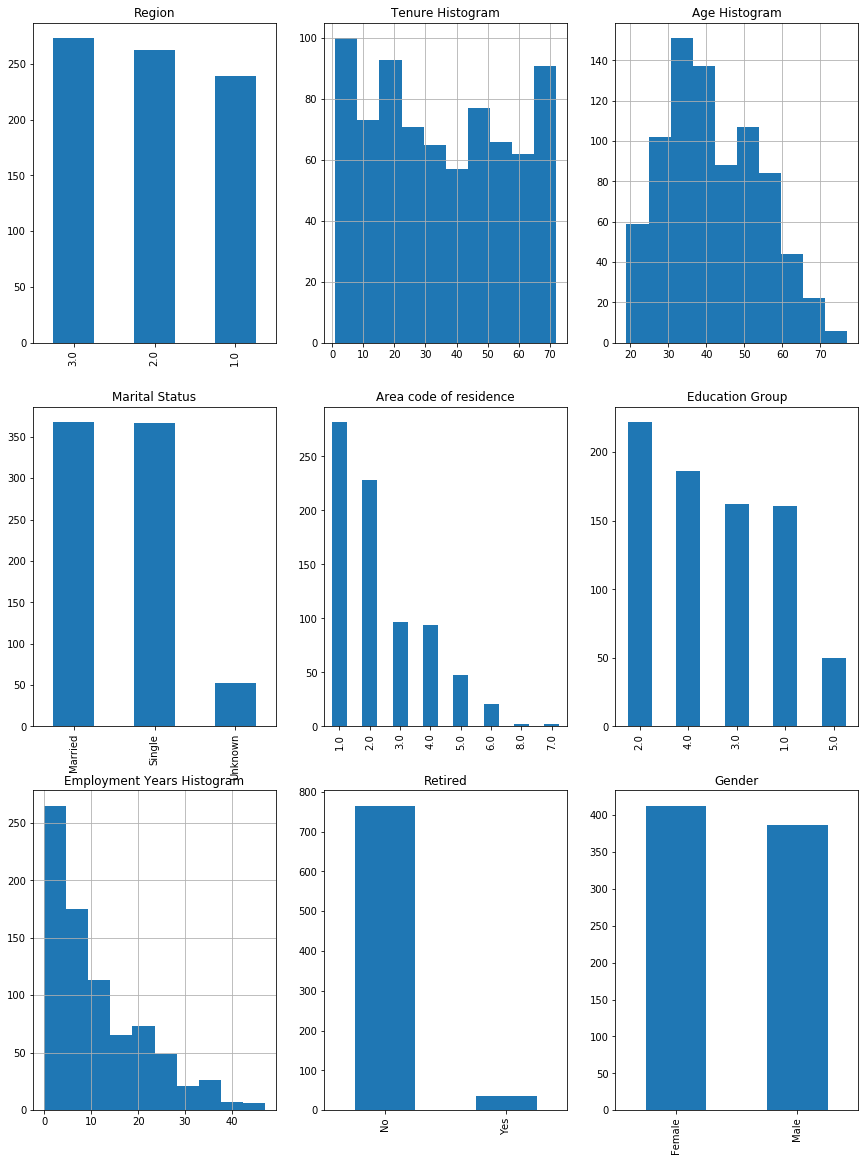

In [6]:
# Set up a grid of plots
fig = plt.figure(figsize=(20,20)) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df_train['region'].value_counts().plot(kind='bar', 
                                         title='Region')

plt.subplot2grid(fig_dims, (0, 1))
df_train[df_train['tenure']<999]['tenure'].hist()
plt.title('Tenure Histogram')

plt.subplot2grid(fig_dims, (0, 2))
df_train['age'].hist()
plt.title('Age Histogram')

plt.subplot2grid(fig_dims, (1, 0))
df_train['marital'].value_counts().plot(kind='bar', 
                                       title='Marital Status')

plt.subplot2grid(fig_dims, (1, 2))
df_train['ed'].value_counts().plot(kind='bar', 
                                    title='Education Group')

plt.subplot2grid(fig_dims, (2, 0))
df_train['employ'].hist()
plt.title('Employment Years Histogram')

plt.subplot2grid(fig_dims, (2, 1))
df_train['retire'].value_counts().plot(kind='bar', 
                                         title='Retired')

plt.subplot2grid(fig_dims, (2, 2))
df_train['gender'].value_counts().plot(kind='bar', 
                                         title='Gender')

plt.subplot2grid(fig_dims, (1,1))
df_train['reside'].value_counts().plot(kind='bar', 
                                         title='Area code of residence')

In [7]:
#drop na for region and reside
df_train= df_train.dropna(subset = ['region'])
df_train= df_train.dropna(subset = ['reside'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        748 non-null    float64
 1   tenure        748 non-null    int64  
 2   age           748 non-null    int64  
 3   income        733 non-null    float64
 4   marital       737 non-null    object 
 5   address zone  748 non-null    object 
 6   ed            730 non-null    float64
 7   employ        748 non-null    int64  
 8   retire        748 non-null    object 
 9   gender        748 non-null    object 
 10  reside        748 non-null    float64
 11  custcat       748 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 76.0+ KB


In [8]:
#impute income with median income of each age
df_train['income'] = df_train.groupby('age')['income'].apply(lambda x:x.fillna(x.median()))
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        748 non-null    float64
 1   tenure        748 non-null    int64  
 2   age           748 non-null    int64  
 3   income        748 non-null    float64
 4   marital       737 non-null    object 
 5   address zone  748 non-null    object 
 6   ed            730 non-null    float64
 7   employ        748 non-null    int64  
 8   retire        748 non-null    object 
 9   gender        748 non-null    object 
 10  reside        748 non-null    float64
 11  custcat       748 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 76.0+ KB


In [9]:
#impute marital with mode of each age
df_train['marital'] = df_train.groupby('age')['marital'].apply(lambda x:x.fillna(x.value_counts().index[0]))
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        748 non-null    float64
 1   tenure        748 non-null    int64  
 2   age           748 non-null    int64  
 3   income        748 non-null    float64
 4   marital       748 non-null    object 
 5   address zone  748 non-null    object 
 6   ed            730 non-null    float64
 7   employ        748 non-null    int64  
 8   retire        748 non-null    object 
 9   gender        748 non-null    object 
 10  reside        748 non-null    float64
 11  custcat       748 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 76.0+ KB


In [10]:
#impute ed with median at each age
df_train['ed'] = df_train.groupby('age')['ed'].apply(lambda x:x.fillna(x.median()))
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        748 non-null    float64
 1   tenure        748 non-null    int64  
 2   age           748 non-null    int64  
 3   income        748 non-null    float64
 4   marital       748 non-null    object 
 5   address zone  748 non-null    object 
 6   ed            748 non-null    float64
 7   employ        748 non-null    int64  
 8   retire        748 non-null    object 
 9   gender        748 non-null    object 
 10  reside        748 non-null    float64
 11  custcat       748 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 76.0+ KB


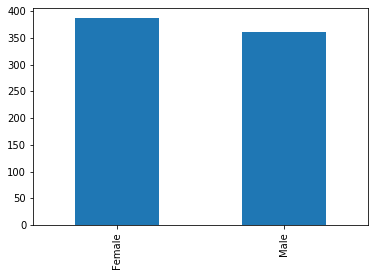

In [11]:
df_train['gender'].value_counts().plot(kind = 'bar')
df_train['gender'] = df_train['gender'].map({'Male': 0, 'Female': 1})

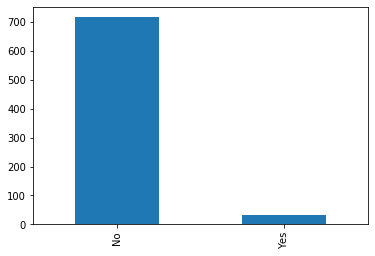

In [12]:
df_train['retire'].value_counts().plot(kind = 'bar')
df_train['retire'] = df_train['retire'].map({'Yes': 0, 'No': 1})

In [13]:
cols = pd.get_dummies(df_train['marital'])
df_train[cols.columns] = cols
df_train.drop('marital', axis = 1, inplace = True)

In [14]:
cols = pd.get_dummies(df_train['address zone'])
df_train[cols.columns] = cols
df_train.drop('address zone', axis = 1, inplace = True)

In [15]:
cols = pd.get_dummies(df_train['reside'])
df_train[cols.columns] = cols
df_train.drop('reside', axis = 1, inplace = True)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 799
Data columns (total 68 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   748 non-null    float64
 1   tenure   748 non-null    int64  
 2   age      748 non-null    int64  
 3   income   748 non-null    float64
 4   ed       748 non-null    float64
 5   employ   748 non-null    int64  
 6   retire   748 non-null    int64  
 7   gender   748 non-null    int64  
 8   custcat  748 non-null    object 
 9   Married  748 non-null    uint8  
 10  Single   748 non-null    uint8  
 11  Unknown  748 non-null    uint8  
 12  Zone 0   748 non-null    uint8  
 13  Zone 1   748 non-null    uint8  
 14  Zone 10  748 non-null    uint8  
 15  Zone 11  748 non-null    uint8  
 16  Zone 12  748 non-null    uint8  
 17  Zone 13  748 non-null    uint8  
 18  Zone 14  748 non-null    uint8  
 19  Zone 15  748 non-null    uint8  
 20  Zone 16  748 non-null    uint8  
 21  Zone 17  748 non

# Preprocessing ``test.csv`` (10 points)

In [17]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    200 non-null    int64  
 1   region        195 non-null    float64
 2   tenure        200 non-null    int64  
 3   age           200 non-null    int64  
 4   income        192 non-null    float64
 5   marital       195 non-null    object 
 6   address zone  200 non-null    object 
 7   ed            196 non-null    float64
 8   employ        200 non-null    object 
 9   retire        200 non-null    int64  
 10  gender        200 non-null    object 
 11  reside        195 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 18.9+ KB


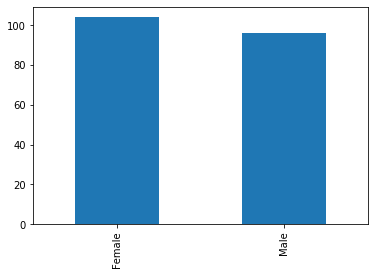

In [18]:
df_test['gender'].value_counts().plot(kind = 'bar')
df_test['gender'] = df_test['gender'].map({'Male': 0, 'Female': 1}).astype(float)

In [19]:
df_test_x = df_test.drop('Unnamed: 0', axis =1)

In [20]:
df_test['employ'] = df_test['employ'].replace(['^\s+$'], np.nan, regex = True)
df_test[df_test['employ'].isna()]= 0
df_test['employ'] = df_test['employ'].astype(int)

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    200 non-null    int64  
 1   region        196 non-null    float64
 2   tenure        200 non-null    int64  
 3   age           200 non-null    int64  
 4   income        192 non-null    float64
 5   marital       195 non-null    object 
 6   address zone  200 non-null    object 
 7   ed            196 non-null    float64
 8   employ        200 non-null    int32  
 9   retire        200 non-null    int64  
 10  gender        200 non-null    float64
 11  reside        195 non-null    float64
dtypes: float64(5), int32(1), int64(4), object(2)
memory usage: 18.1+ KB


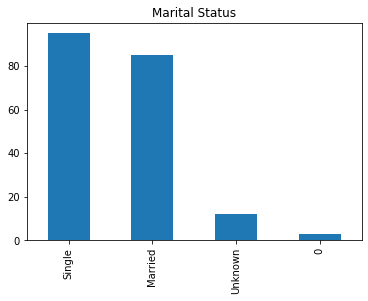

In [22]:
df_test['marital'].value_counts().plot(kind='bar', 
                                       title='Marital Status')

In [23]:
#impute income with median income of each age
df_test['income'] = df_test.groupby('age')['income'].apply(lambda x:x.fillna(x.median()))
#impute ed with median at each age
df_test['ed'] = df_test.groupby('age')['ed'].apply(lambda x:x.fillna(x.median()))
#impute marital with mode of each age
df_test['marital'] = df_test.groupby('age')['marital'].fillna(df_test['marital'].mode().iloc[0])
#impute region with most frequent class of age group
df_test['region'] = df_test.groupby('age')['region'].apply(lambda x:x.fillna(x.value_counts().index[0]))
#impute reside with most frequent class of age group
df_test['reside'] = df_test.groupby('age')['reside'].apply(lambda x:x.fillna(x.value_counts().index[0]))

df_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    200 non-null    int64  
 1   region        200 non-null    float64
 2   tenure        200 non-null    int64  
 3   age           200 non-null    int64  
 4   income        200 non-null    float64
 5   marital       200 non-null    object 
 6   address zone  200 non-null    object 
 7   ed            200 non-null    float64
 8   employ        200 non-null    int32  
 9   retire        200 non-null    int64  
 10  gender        200 non-null    float64
 11  reside        200 non-null    float64
dtypes: float64(5), int32(1), int64(4), object(2)
memory usage: 18.1+ KB


In [24]:
cols = pd.get_dummies(df_test['marital'])
df_test[cols.columns] = cols
df_test.drop('marital', axis = 1, inplace = True)

In [25]:
cols = pd.get_dummies(df_test['address zone'])
df_test[cols.columns] = cols
df_test.drop('address zone', axis = 1, inplace = True)

In [26]:
cols = pd.get_dummies(df_test['reside'])
df_test[cols.columns] = cols
df_test.drop('reside', axis = 1, inplace = True)

In [27]:
missing_cols = set(df_train.columns) - set(df_test.columns)
for c in missing_cols:
    df_test[c] = 0
df_test = df_test[df_train.columns]
df_test = df_test.drop('custcat', axis = 1)

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 67 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   200 non-null    float64
 1   tenure   200 non-null    int64  
 2   age      200 non-null    int64  
 3   income   200 non-null    float64
 4   ed       200 non-null    float64
 5   employ   200 non-null    int32  
 6   retire   200 non-null    int64  
 7   gender   200 non-null    float64
 8   Married  200 non-null    uint8  
 9   Single   200 non-null    uint8  
 10  Unknown  200 non-null    uint8  
 11  Zone 0   200 non-null    uint8  
 12  Zone 1   200 non-null    uint8  
 13  Zone 10  200 non-null    uint8  
 14  Zone 11  200 non-null    uint8  
 15  Zone 12  200 non-null    uint8  
 16  Zone 13  200 non-null    uint8  
 17  Zone 14  200 non-null    uint8  
 18  Zone 15  200 non-null    uint8  
 19  Zone 16  200 non-null    uint8  
 20  Zone 17  200 non-null    uint8  
 21  Zone 18  200 non

# Machine learning models (20 points)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [30]:
y = df_train['custcat']
x = df_train.drop('custcat', axis =1)

In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 799
Data columns (total 67 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   748 non-null    float64
 1   tenure   748 non-null    int64  
 2   age      748 non-null    int64  
 3   income   748 non-null    float64
 4   ed       748 non-null    float64
 5   employ   748 non-null    int64  
 6   retire   748 non-null    int64  
 7   gender   748 non-null    int64  
 8   Married  748 non-null    uint8  
 9   Single   748 non-null    uint8  
 10  Unknown  748 non-null    uint8  
 11  Zone 0   748 non-null    uint8  
 12  Zone 1   748 non-null    uint8  
 13  Zone 10  748 non-null    uint8  
 14  Zone 11  748 non-null    uint8  
 15  Zone 12  748 non-null    uint8  
 16  Zone 13  748 non-null    uint8  
 17  Zone 14  748 non-null    uint8  
 18  Zone 15  748 non-null    uint8  
 19  Zone 16  748 non-null    uint8  
 20  Zone 17  748 non-null    uint8  
 21  Zone 18  748 non

In [32]:
x_train_org, x_test_org, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)
df_test_x = scaler.transform(df_test)

Train Macro Precision score: 0.4508
Test Macro Precision score: 0.2726


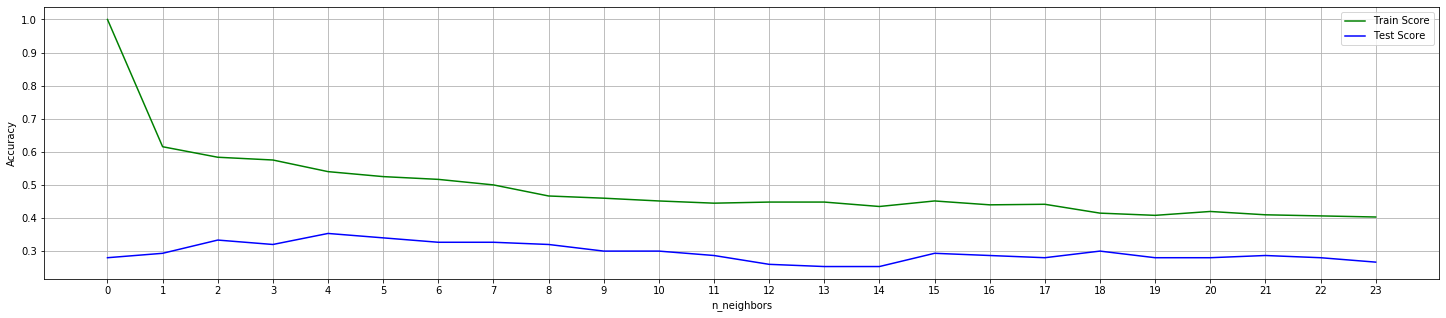

In [33]:
from sklearn.neighbors import KNeighborsClassifier
train_score_array = []
test_score_array = []

x_axis = range(1,25)

for k in x_axis:
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    train_score_array.append(knn.score(x_train, y_train))
    test_score_array.append(knn.score(x_test, y_test))

%matplotlib inline

plt.subplots(figsize = (25,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(25))
plt.grid()
plt.legend()

knn = KNeighborsClassifier(12)
knn.fit(x_train, y_train)
print('Train Macro Precision score: %.4f'%precision_score(y_train, knn.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, knn.predict(x_test), average = 'macro'))
# k = 12 best results

Train Macro Precision score: 0.4667
Test Macro Precision score: 0.2972


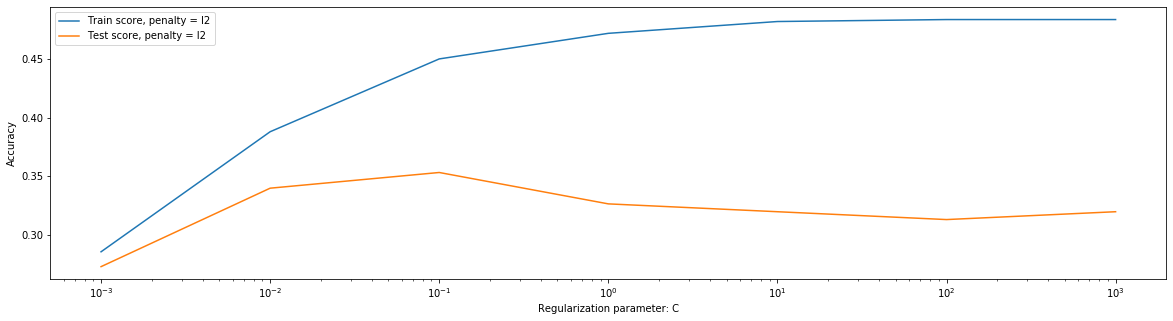

In [34]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l2 = []
test_score_l2 = []

for c in c_range:
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 5000, random_state=42, multi_class = 'multinomial')
    log_l2.fit(x_train, y_train)
    train_score_l2.append(log_l2.score(x_train, y_train))
    test_score_l2.append(log_l2.score(x_test, y_test))
    
plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log') 
#L1 with C=1
log_l2 = LogisticRegression(penalty = 'l2', C = 1, solver = 'lbfgs', max_iter = 5000, random_state=42, multi_class = 'multinomial')
log_l2.fit(x_train, y_train)
print('Train Macro Precision score: %.4f'%precision_score(y_train, log_l2.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, log_l2.predict(x_test), average = 'macro'))

Train Macro Precision score: 0.1307
Test Macro Precision score: 0.1188


C:\Users\268671\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\268671\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


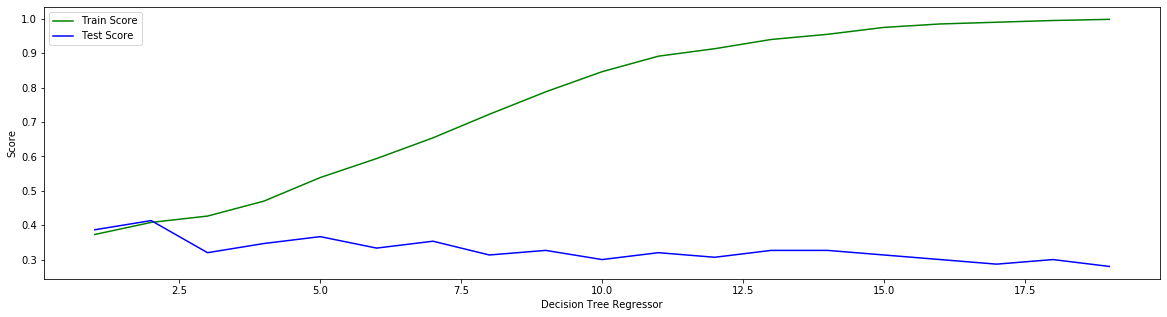

In [35]:
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
train_score_array = []
test_score_array = []
x_axis = range(1,20)

for k in x_axis:
    clf = DecisionTreeClassifier(random_state=42,max_depth=k)
    clf.fit(x_train_org, y_train)

    train_score_array.append(clf.score(x_train_org, y_train))
    test_score_array.append(clf.score(x_test_org, y_test))
    

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Decision Tree Regressor')
plt.ylabel('Score')
#max_depth = 10

clf = DecisionTreeClassifier(random_state=42,max_depth=10)
clf.fit(x_train_org, y_train)
print('Train Macro Precision score: %.4f'%precision_score(y_train, clf.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, clf.predict(x_test), average = 'macro'))

C:\Users\268671\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\268671\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\268671\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\268671\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Score:  [0.44816053511705684, 0.49331103678929766, 0.4782608695652174, 0.48327759197324416, 0.48494983277591974, 0.4816053511705686, 0.41638795986622074, 0.41638795986622074, 0.4180602006688963]
Test Score:  [0.32666666666666666, 0.32, 0.32, 0.32, 0.32666666666666666, 0.32666666666666666, 0.26, 0.26, 0.3933333333333333]


C:\Users\268671\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train Macro Precision score: 0.4129
Test Macro Precision score: 0.2551


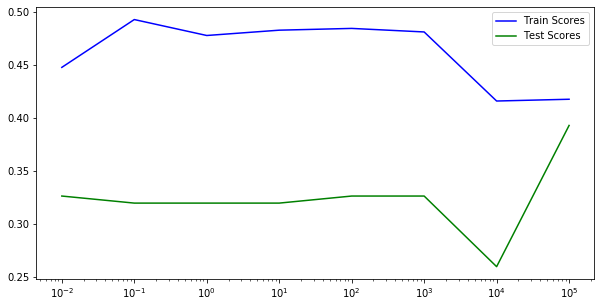

In [36]:
from sklearn.svm import LinearSVC

train_scores =[]
test_scores = []
x_range = [0.01, 0.1, 1, 10, 100, 1000, 10000, 10000,100000]

for i in x_range:
    clf1 = LinearSVC(random_state = 42, C = i, max_iter = 100000)
    clf1.fit(x_train, y_train)
    train_scores.append(clf1.score(x_train, y_train))
    test_scores.append(clf1.score(x_test, y_test))
print('Train Score: ', train_scores)
print('Test Score: ', test_scores)

plt.figure(figsize=(10,5))
plt.plot(x_range, train_scores, color = 'blue', label = 'Train Scores')
plt.plot(x_range, test_scores, color = 'green', label = 'Test Scores')
plt.xscale('log')
plt.legend()
#best C = 10000

clf1 = LinearSVC(random_state = 42, C = 10000, max_iter = 100000)
clf1.fit(x_train, y_train)
print('Train Macro Precision score: %.4f'%precision_score(y_train, clf1.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, clf1.predict(x_test), average = 'macro'))

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [100,1000,10000,100000, 1000000],
              'gamma': [0.1, 1, 10, 100]}

In [38]:
grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=3, return_train_score=True, n_jobs = -1)
grid_search.fit(x_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

svc_rbf = SVC(kernel = 'rbf', C = 100, gamma = 1)
svc_rbf.fit(x_train, y_train)
print('Train Macro Precision score: %.4f'%precision_score(y_train, svc_rbf.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, svc_rbf.predict(x_test), average = 'macro'))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.35
Train Macro Precision score: 0.9968
Test Macro Precision score: 0.2959


In [39]:
svc_linear = SVC(kernel = 'linear', C = 100, gamma = 1)
svc_linear.fit(x_train, y_train)
print('Train Macro Precision score: %.4f'%precision_score(y_train, svc_linear.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, svc_linear.predict(x_test), average = 'macro'))

Train Macro Precision score: 0.4992
Test Macro Precision score: 0.3209


In [40]:
param_grid = {'C': [100,1000,10000,100000, 1000000],
              'gamma': [0.1, 1, 10, 100]}
grid_search_poly = GridSearchCV(SVC(kernel='poly', degree = 2), param_grid, cv=3, return_train_score=True, n_jobs = -1)
grid_search_poly.fit(x_train, y_train)
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.34


In [41]:
#Hard Voting Classifier
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression(penalty = 'l2', C = 10, solver = 'lbfgs', max_iter = 5000, random_state=42)
dtree_clf = DecisionTreeClassifier(random_state=42,max_depth=10)
svc_clf = SVC(C = 100, gamma =1, probability = True, random_state= 42, kernel = 'rbf')

voting_hard_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dtree_clf), ('svc', svc_clf)], voting='hard')
voting_hard_clf.fit(x_train, y_train)

from sklearn.metrics import precision_score
for clf in (log_clf, dtree_clf, svc_clf, voting_hard_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, '%.4f'%precision_score(y_test, y_pred, average = 'macro'))


LogisticRegression 0.2928
DecisionTreeClassifier 0.3002
SVC 0.2959
VotingClassifier 0.3089


In [42]:
#Soft Voting Classifier
voting_hard_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dtree_clf), ('svc', svc_clf)], voting='soft')
voting_hard_clf.fit(x_train, y_train)
for clf in (log_clf, dtree_clf, svc_clf, voting_hard_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, '%.4f'%precision_score(y_test, y_pred, average = 'macro'))

LogisticRegression 0.2928
DecisionTreeClassifier 0.3002
SVC 0.2959
VotingClassifier 0.2871


In [43]:
#Bagging - Decision Tree
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(dtree_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=42, oob_score = True)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

print('Train Macro Precision score: %.4f'%precision_score(y_train, bag_clf.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, bag_clf.predict(x_test), average = 'macro'))
print('Out-of-bag score: %.4f'%bag_clf.oob_score_)

Train Macro Precision score: 0.7177
Test Macro Precision score: 0.4150
Out-of-bag score: 0.3746


In [44]:
#Bagging - Logistic 
bag_clf = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=42, oob_score = True)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

print('Train Macro Precision score: %.4f'%precision_score(y_train, bag_clf.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, bag_clf.predict(x_test), average = 'macro'))
print('Out-of-bag score: %.4f'%bag_clf.oob_score_)

Train Macro Precision score: 0.4963
Test Macro Precision score: 0.2791
Out-of-bag score: 0.3462


In [45]:
#Pasting - Decision Tree
bag_clf = BaggingClassifier(dtree_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=42)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

print('Train Macro Precision score: %.4f'%precision_score(y_train, bag_clf.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, bag_clf.predict(x_test), average = 'macro'))

Train Macro Precision score: 0.7168
Test Macro Precision score: 0.3871


In [46]:
#Pasting - Logistic
bag_clf = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=42)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

print('Train Macro Precision score: %.4f'%precision_score(y_train, bag_clf.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, bag_clf.predict(x_test), average = 'macro'))

Train Macro Precision score: 0.4994
Test Macro Precision score: 0.2734


In [47]:
from sklearn.ensemble import AdaBoostClassifier
dtree_clf = DecisionTreeClassifier(random_state=42,max_depth=10)
ab =AdaBoostClassifier(n_estimators=50, base_estimator=dtree_clf,learning_rate=1, random_state=42)
ab_model = ab.fit(x_train, y_train)
y_pred = ab_model.predict(x_test)

print('Train Macro Precision score: %.4f'%precision_score(y_train, ab_model.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, ab_model.predict(x_test), average = 'macro'))

Train Macro Precision score: 1.0000
Test Macro Precision score: 0.3211


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1, random_state=42)
gbrt.fit(x_train, y_train)
print('Train Macro Precision score: %.4f'%precision_score(y_train, gbrt.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, gbrt.predict(x_test), average = 'macro'))

Train Macro Precision score: 0.6443
Test Macro Precision score: 0.3463


# Best model ( 5 points)
Explain which machine learning model is the best model for this dataset and why? 

The best model was generated using a Decision Tree Classifier with Bagging. It had the highest macro precision score on the test dataset (part of the train dataset).

In [49]:
#Bagging - Decision Tree
from sklearn.ensemble import BaggingClassifier
dtree_clf = DecisionTreeClassifier(random_state=42,max_depth=10)
bag_clf = BaggingClassifier(dtree_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=42, oob_score = True)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

print('Train Macro Precision score: %.4f'%precision_score(y_train, bag_clf.predict(x_train), average = 'macro'))
print('Test Macro Precision score: %.4f'%precision_score(y_test, bag_clf.predict(x_test), average = 'macro'))
print('Out-of-bag score: %.4f'%bag_clf.oob_score_)

Train Macro Precision score: 0.7177
Test Macro Precision score: 0.4150
Out-of-bag score: 0.3746


# Grading (50 points)
You should be able to correctly print the final prediction executing the following statement: 

In [51]:
final_test_prediction = bag_clf.predict(df_test_x)

200

In [52]:
final_test_prediction

array(['D', 'C', 'B', 'A', 'A', 'D', 'A', 'A', 'A', 'C', 'C', 'C', 'A',
       'D', 'A', 'A', 'A', 'C', 'A', 'C', 'C', 'C', 'A', 'B', 'C', 'C',
       'A', 'D', 'B', 'C', 'C', 'A', 'D', 'B', 'A', 'D', 'D', 'C', 'C',
       'C', 'C', 'A', 'D', 'C', 'A', 'C', 'A', 'A', 'C', 'D', 'C', 'D',
       'B', 'B', 'C', 'A', 'B', 'C', 'C', 'D', 'A', 'B', 'D', 'C', 'B',
       'A', 'D', 'A', 'A', 'A', 'A', 'A', 'D', 'D', 'A', 'D', 'B', 'C',
       'D', 'C', 'A', 'D', 'C', 'A', 'A', 'B', 'B', 'C', 'D', 'A', 'A',
       'C', 'C', 'C', 'C', 'A', 'C', 'B', 'D', 'D', 'A', 'A', 'C', 'C',
       'C', 'A', 'D', 'C', 'D', 'D', 'C', 'D', 'D', 'A', 'B', 'D', 'C',
       'A', 'D', 'C', 'C', 'A', 'C', 'A', 'C', 'D', 'A', 'D', 'D', 'A',
       'A', 'C', 'D', 'B', 'C', 'A', 'D', 'A', 'D', 'C', 'B', 'A', 'A',
       'C', 'D', 'A', 'A', 'C', 'A', 'C', 'C', 'C', 'C', 'C', 'C', 'D',
       'A', 'C', 'B', 'A', 'A', 'B', 'B', 'C', 'D', 'C', 'D', 'B', 'D',
       'C', 'A', 'D', 'D', 'C', 'C', 'B', 'A', 'C', 'C', 'A', 'A